#TS Modeling- ARIMA

In [1]:
pip install pmdarima

     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/5

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Suyash Tambe\AppData\Local\Programs\Python\Python311\Lib\http\client.py", lin

In [5]:
import pandas as pd
import numpy as np

#Read Data

In [6]:
df=pd.read_csv(r'C:\Users\Suyash Tambe\Desktop\New folder\MaunaLoaDailyTemps.csv',
                index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
print('--Head--')
print(df.head())
print('--Tail--')
print(df.tail())

Shape of data (1821, 5)
--Head--
            MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
DATE                                                  
2014-01-01     33.0     46.0     40.0      657    1756
2014-01-02     35.0     50.0     43.0      657    1756
2014-01-03     36.0     45.0     41.0      657    1757
2014-01-04     32.0     41.0     37.0      658    1757
2014-01-05     24.0     38.0     31.0      658    1758
--Tail--
            MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
DATE                                                  
2018-12-26     35.0     45.0     40.0      654    1752
2018-12-27     33.0     44.0     39.0      655    1752
2018-12-28     33.0     47.0     40.0      655    1753
2018-12-29     36.0     47.0     42.0      655    1753
2018-12-30     39.0     52.0     46.0      656    1754


In [ ]:
df

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


#Plot Your Data

<Axes: xlabel='DATE'>

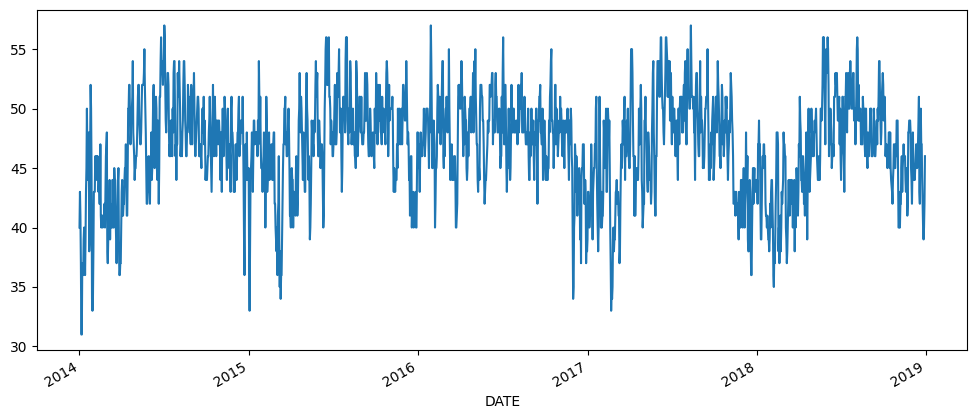

In [ ]:
df['AvgTemp'].plot(figsize=(12,5))

#Check For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


#Figure Out Order for ARIMA Model

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['AvgTemp'],trace=True,
                        suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.735, Time=3.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.67 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.311, Time=3.82 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.337, Time=2.33 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=2.17 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.577, Time=2.71 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.293, Time=3.42 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.620, Time=4.15 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.228, Time=2.95 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.517
Date:                Fri, 11 Aug 2023   AIC                           8295.034
Time:                        08:30:21   BIC                           8339.092
Sample:                             0   HQIC                          8311.288
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2070      0.362      3.335      0.001       0.498       1.916
ar.L1          0.9739      0.008    124.621      0.000       0.959       0.989
ma.L1         -0.1246      0.024     -5.256      0.000      -0.171      -0.078
ma.L2         -0.2196      0.024     -9.115      0.000      -0.267      -0.172
ma.L3         -0.2056      0.024     -8.615      0.000      -0.252      -0.159
ma.L4         -0.1373      0.023     -6.034      0.000      -0.182      -0.093
ma.L5         -0.0476      0.024     -1.952      0.051      -0.095       0.000
sigma2         5.4981      0.172     31.952      0.000       5.161       5.835
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.20
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 5)
(1791, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


## Train the Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Fri, 11 Aug 2023   AIC                           8156.395
Time:                        08:09:58   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Make Predictions on Test Set

<Axes: xlabel='DATE'>

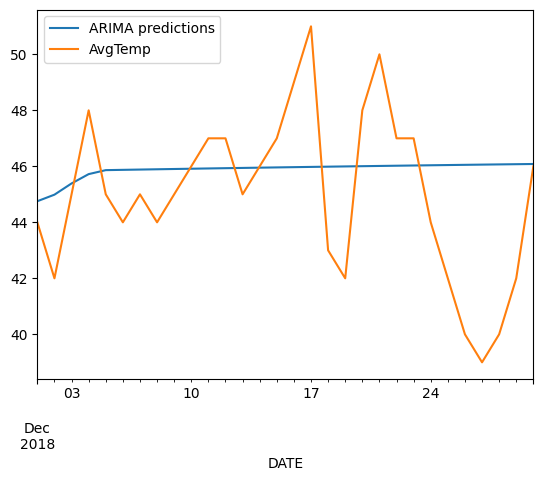

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)


In [ ]:
test['AvgTemp'].mean()

45.0

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)


3.000463825206671


In [ ]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


#For Future Dates

In [ ]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.418064
2018-12-31    46.113783
2019-01-01    45.617772
2019-01-02    45.249555
2019-01-03    45.116984
2019-01-04    45.136771
2019-01-05    45.156280
2019-01-06    45.175516
2019-01-07    45.194482
2019-01-08    45.213183
2019-01-09    45.231622
2019-01-10    45.249802
2019-01-11    45.267728
2019-01-12    45.285403
2019-01-13    45.302830
2019-01-14    45.320012
2019-01-15    45.336955
2019-01-16    45.353659
2019-01-17    45.370130
2019-01-18    45.386370
2019-01-19    45.402383
2019-01-20    45.418171
2019-01-21    45.433738
2019-01-22    45.449087
2019-01-23    45.464221
2019-01-24    45.479143
2019-01-25    45.493855
2019-01-26    45.508362
2019-01-27    45.522665
2019-01-28    45.536769
2019-01-29    45.550674
Freq: D, Name: ARIMA Predictions, dtype: float64


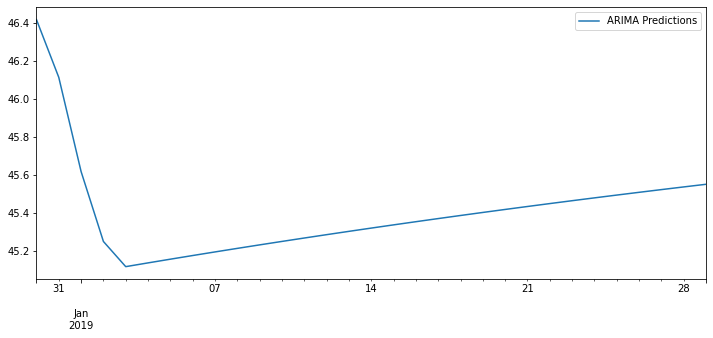

In [ ]:
pred.plot(figsize=(12,5),legend=True)
